# Crime data in Chicago (January 1, 2010 to December 30, 2019)

In [1]:
import pandas as pd
crime_data = pd.read_csv('crime_data.csv')
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [2]:
import datetime

cols_to_remove = list(crime_data)

# Separating the date column into month, day, year, and time columns
Months = []
Days   = []
Years  = []
Hours  = []

for row in crime_data['Date']:
    d = datetime.datetime.strptime(row, '%m/%d/%Y %I:%M:%S %p')
    Months.append(d.month)
    Days.append(d.day)
    Years.append(d.year)
    Hours.append(d.hour)
    
crime_data['Month'] = Months
crime_data['Day'] = Days
crime_data['Year1'] = Years
crime_data['Hour'] = Hours

crime_data[-4:]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Year1,Hour
2371643,4767319,HM355281,05/01/2005 12:01:00 AM,007XX N LECLAIRE AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,1904605.0,2005,02/10/2018 03:50:01 PM,41.894295,-87.753133,"(41.894294663, -87.753132545)",5,1,2005,0
2371644,6740081,HR156850,09/04/2005 12:00:00 AM,049XX W BERENICE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,...,1925137.0,2005,02/28/2018 03:56:25 PM,41.950628,-87.750843,"(41.950627601, -87.750842714)",9,4,2005,0
2371645,9041881,HW187799,08/28/2005 06:00:00 PM,053XX W DRUMMOND PL,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,1917106.0,2005,04/15/2016 08:55:02 AM,41.928635,-87.760068,"(41.928635187, -87.760068334)",8,28,2005,18
2371646,9593735,HX242741,04/16/2005 12:01:00 AM,041XX S MONTGOMERY AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,True,...,1877303.0,2005,06/02/2018 03:46:15 PM,41.819044,-87.691718,"(41.819044212, -87.691717509)",4,16,2005,0


In [3]:
# 1-hot encoding for: Arrest, Location Description, Domestic, District, Primary Type, Community Area
discrete_variables = "Arrest, Location Description, Domestic, District, Primary Type, Community Area".split(", ")
print(discrete_variables)
for variable in discrete_variables:
    for dtype in crime_data[variable].dropna().unique():
        if (dtype != "nan"):
            crime_data[variable+"_"+str(dtype)]  = 1*(crime_data[variable] == dtype)

crime_data = crime_data.drop(columns=cols_to_remove)
crime_data = crime_data.drop(columns=['Arrest_False','Domestic_False'])
crime_data[-4:]

['Arrest', 'Location Description', 'Domestic', 'District', 'Primary Type', 'Community Area']


,Month,Day,Year1,Hour,Arrest_True,Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL),Location Description_APARTMENT,Location Description_RESIDENCE,Location Description_COMMERCIAL / BUSINESS OFFICE,Location Description_PORCH,...,Community Area_6.0,Community Area_20.0,Community Area_59.0,Community Area_54.0,Community Area_4.0,Community Area_34.0,Community Area_9.0,Community Area_55.0,Community Area_10.0,Community Area_0.0
2371643,5,1,2005,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2371644,9,4,2005,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2371645,8,28,2005,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2371646,4,16,2005,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Month                  3.346671
Day                    8.828623
Year1                  1.409460
Hour                   6.792874
Arrest_True            0.458100
                         ...   
Community Area_34.0    0.052087
Community Area_9.0     0.026086
Community Area_55.0    0.039621
Community Area_10.0    0.055038
Community Area_0.0     0.003730
Length: 300, dtype: float64

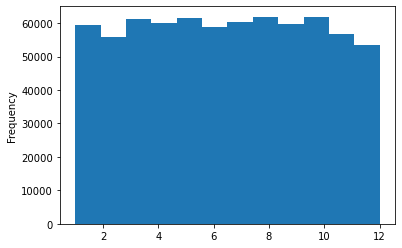

In [4]:
arr_true = crime_data[crime_data['Arrest_True'] == 1]
ax = arr_true['Month'].plot.hist(bins=12)
crime_data.std()

In [5]:
#scale all variables to be between 0 and 1
#iterate through all columns
for c in crime_data.columns:
    print(c)
    if c != 'Year1':
        crime_data[c] = (crime_data[c]-crime_data[c].min())/(crime_data[c].max() - crime_data[c].min())

crime_data.std().sort_values()

Month
Day
Year1
Hour
Arrest_True
Location Description_PARKING LOT / GARAGE (NON RESIDENTIAL)
Location Description_APARTMENT
Location Description_RESIDENCE
Location Description_COMMERCIAL / BUSINESS OFFICE
Location Description_PORCH
Location Description_CHA HALLWAY / STAIRWELL / ELEVATOR
Location Description_CHURCH / SYNAGOGUE / PLACE OF WORSHIP
Location Description_SMALL RETAIL STORE
Location Description_OTHER (SPECIFY)
Location Description_STREET
Location Description_ALLEY
Location Description_PARK PROPERTY
Location Description_OTHER
Location Description_SIDEWALK
Location Description_PARKING LOT/GARAGE(NON.RESID.)
Location Description_CHA HALLWAY/STAIRWELL/ELEVATOR
Location Description_CHA PARKING LOT/GROUNDS
Location Description_WAREHOUSE
Location Description_CTA PLATFORM
Location Description_DRIVEWAY - RESIDENTIAL
Location Description_AIRPORT/AIRCRAFT
Location Description_OTHER RAILROAD PROP / TRAIN DEPOT
Location Description_HIGHWAY/EXPRESSWAY
Location Description_POLICE FACILITY/V

Community Area_12.0
Community Area_52.0
Community Area_39.0
Community Area_16.0
Community Area_73.0
Community Area_69.0
Community Area_64.0
Community Area_37.0
Community Area_18.0
Community Area_72.0
Community Area_42.0
Community Area_63.0
Community Area_11.0
Community Area_13.0
Community Area_46.0
Community Area_57.0
Community Area_36.0
Community Area_77.0
Community Area_5.0
Community Area_50.0
Community Area_68.0
Community Area_51.0
Community Area_47.0
Community Area_48.0
Community Area_6.0
Community Area_20.0
Community Area_59.0
Community Area_54.0
Community Area_4.0
Community Area_34.0
Community Area_9.0
Community Area_55.0
Community Area_10.0
Community Area_0.0


Location Description_SCHOOL - PUBLIC GROUNDS             0.000649
Location Description_FACTORY / MANUFACTURING BUILDING    0.000649
Location Description_VACANT LOT / LAND                   0.000649
Location Description_CHURCH PROPERTY                     0.000649
Primary Type_DOMESTIC VIOLENCE                           0.000649
                                                           ...   
Primary Type_BATTERY                                     0.391117
Primary Type_THEFT                                       0.401035
Location Description_STREET                              0.457260
Arrest_True                                              0.458100
Year1                                                    1.409460
Length: 300, dtype: float64

In [6]:
import numpy as np

X = crime_data.to_numpy()

In [7]:
# run PCA analysis (this can probably be deleted)
import sklearn
from sklearn.decomposition import PCA

#pca = PCA(n_components=5) #find 2 principal components
#fit = pca.fit(X)
#print(("Explained Variance: %s") % (fit.explained_variance_ratio_))

#pc1, pc2, pc3, pc4, p5 = pca.components_

#weights1 = list(zip(pc1, crime_data.columns))
#weights1.sort()

#print('Principal Component 1: \n (Negative)',weights1[:5], '\n\n (Positive)' ,weights1[-5:])

In [8]:
# evaluate different trends
from sklearn.model_selection import train_test_split

#print(crime_data.groupby(['Arrest_True'])['Arrest_True'].count())
#print("\n")
#print(crime_data.groupby(['Month'])['Arrest_True'].mean())
#print("\n")
#print(crime_data.groupby(['Month'])['Month'].count())
#print("\n")
#print(crime_data.groupby(['Hour'])['Arrest_True'].mean())
#print("\n")
#print(crime_data.groupby(['Hour'])['Hour'].count())


#print(crime_data['Hour'].corr(crime_data['Arrest_True'], method='pearson'))
#print(crime_data['Month'].corr(crime_data['Arrest_True'], method='pearson'))
#print(crime_data['Day'].corr(crime_data['Arrest_True'], method='pearson'))

In [ ]:
# logistic regression model 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import sys
import os
import csv

sys.stdout = open("model_output.txt", "a")

row_list = []
cols = crime_data.columns.drop('Year1','Arrest_True')
row_list.append(cols)

def logmodel(X1, y, year):
    X1.drop(columns = ['Year1'],inplace=True)
    X2 = X1.to_numpy() #defines the features
    Y2 = y.to_numpy() #labels (or what we are predicting)

    #create a testing dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X2,Y2,test_size=0.2,random_state=1)

    log = LogisticRegression(max_iter=210000) #model that we use
    model = log.fit(X_train,Y_train)
    
    Y_pred = log.predict(X_test) #evaluation and prediction
    
    # print year
    print(str(year)+"\n")
    
    # print model fitting information
    print(classification_report(Y_test, Y_pred))
    
    # print sorted weights corresponding to each feature
    l = log.coef_
    row_list.append(l[0])
    weights = list(zip(l[0], X1.columns))
    weights.sort()
    print(weights)
    print("\n")
    
    
M = crime_data

# run model on each year
i = 2020
while i>2000:
    X = M[M['Year1'] == i].drop(columns = ['Arrest_True'])
    y = M[M['Year1'] == i]['Arrest_True']
    logmodel(X,y,i)
    i = i-1
    
with open('output.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)
    
sys.stdout.close()

In [7]:
import pandas as pd
output1 = pd.read_csv('output_2016-2020.csv')
output2 = pd.read_csv('output_2011-2015.csv')
output3 = pd.read_csv('output_2006-2010.csv')
output4 = pd.read_csv('output_2001-2005.csv')

narcotics_weights = output1['Primary Type_NARCOTICS'].append(output2['Primary Type_NARCOTICS'].append(output3['Primary Type_NARCOTICS'].append(output4['Primary Type_NARCOTICS'])))
print(narcotics_weights)
print(narcotics_weights.mean())


0    6.625264
1    7.282338
2    7.059238
3    7.016578
4    7.261777
0    7.323228
1    5.731100
2    4.851024
3    4.976315
4    6.324878
0    6.121464
1    4.951071
2    4.099373
3    4.088918
4    4.747218
0    6.099290
1    7.088256
2    7.997462
3    7.709283
4    7.686505
Name: Primary Type_NARCOTICS, dtype: float64
6.2520289266


In [ ]:
# more examples from class below ...

In [ ]:
%matplotlib inline  

import matplotlib.pyplot as plt

Y = pca.transform(X)
plt.scatter(Y[:,0], Y[:,1], alpha=0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Let's try to interpret this figure a bit more. Let's see where all the "Baathist" Arab countries lie on this plot:

In [ ]:
arab = ['Syria', 'Jordan', 'Kuwait', 'UAE']
arab_index = [list(flag.index.values).index(a) for a in arab]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[arab_index,0], Y[arab_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/Users/rachaelhutson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/history.py", line 780, in writeout_cache
    self._writeout_input_cache(conn)
  File "/Users/rachaelhutson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/history.py", line 763, in _writeout_input_cache
    conn.execute("INSERT INTO history VALUES (?, ?, ?, ?)",
sqlite3.IntegrityError: UNIQUE constraint failed: history.session, history.line

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rachaelhutson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/history.py", line 834, in run
    self.history_manager.writeout_cache(self.db)
  File "<decorator-gen-16>", line 2, in writeout_cache
  File "/Users/rachaelhutson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/history.py", line 58, in needs_sqlite
    return f(self, *a, **kw)
  File "/

Or we can look at all of the countries in northern europe

In [ ]:
ne = ['Norway', 'Denmark', 'Finland', 'Iceland']
ne_index = [list(flag.index.values).index(a) for a in ne]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[ne_index,0], Y[ne_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Clustering
When we were playing around with the data we manually used data clusters that we roughly knew about to validate our model. How do we do this automatically? Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In particular, we will focus on a simple form of clustering called "k-means". k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

Again, the mathematical details are better left for a machine learning class but you can see how to use scikit-learn to do this:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15) #break the data into 15 clusters
kmeans.fit(X)

In [ ]:
flag[kmeans.labels_ == 9]

In [ ]:
flag[kmeans.labels_ == 6]